# Aufgaben zur instationäre Wärmeleitung in einer Wand

## Aufgabe 1.1

In [17]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from odesolve import *
from instationaer_hilfsfunktionen import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameter

In [7]:
d1 = 0.115
l1 = 1
c1 = 1000
r1 = 1800

d2 = 0.2
l2 = 0.04
c2 = 900
r2 = 50

d3 = 0.25
l3 = 2.3
c3 = 1000
r3 = 2400

wall = [
    WallLayer(d1, l1, c1, r1),
    WallLayer(d2, l2, c2, r2),
    WallLayer(d3, l3, c3, r3)
]

def ti(t):
    return 20

def ta(t):
    ω = 2 * pi / (24 * 3600)
    return 5 - 10 * cos(ω * t)

hi = 7.5
ha = 25

## Punkt 2: Matrix A und Funktion r

Matrix A

In [10]:
l1r = 2 / (d1 / l1 + d2 / l2)
alpha1 = 1 / (c1 * r1 * d1)
A11 = alpha1 * (ha + l1r)
A12 = -alpha1 * l1r

l2l = 2 / (d1 / l1 + d2 / l2)
l2r = 2 / (d2 / l2 + d3 / l3)
alpha2 = 1 / (c2 * r2 * d2)
A21 = -alpha2 * l2l
A22 = alpha2 * (l2l + l2r)
A23 = -alpha2 * l2r

l3l = 2 / (0.2 / 0.04 + 0.25 / 2.3)
alpha3 = 1 / (c3 * r3 * d3)
A32 = -alpha3 * l3l
A33 = alpha3 * (l3l + hi)

A = np.array([[A11, A12, 0], [A21, A22, A23], [0, A32, A33]])

print(A)

[[ 1.22661869e-04 -1.88892195e-06  0.00000000e+00]
 [-4.34452047e-05  8.69440227e-05 -4.34988180e-05]
 [ 0.00000000e+00 -6.52482270e-07  1.31524823e-05]]


Funktion r

In [11]:
def r(t):
    return np.array([alpha1 * ha * ta(t), 0, alpha3 * hi * ti(t)])

print(r(0))
print(r(12 * 3600))

[-0.00060386  0.          0.00025   ]
[0.00181159 0.         0.00025   ]


## Punkt 3: Stationäre Lösung

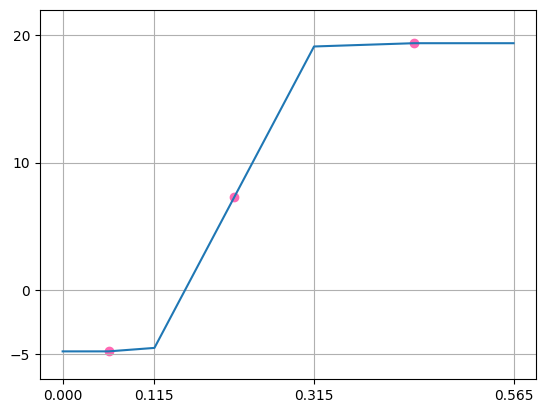

In [27]:
from instationaer_hilfsfunktionen import *

theta0 = np.linalg.solve(A, r(0))
plot_temp(wall, theta0)

## Punkt 4: Funktion der DGL

In [29]:
def F(t, theta):
    return -A @ theta + r(t)

print(F(0, np.zeros(3)))
print(F(0, theta0))

[-0.00060386  0.          0.00025   ]
[ 0.00000000e+00 -1.85567419e-20  0.00000000e+00]


## Punkt 5: Anfangswertproblem lösen

In [30]:
ht = 3600
te = 3 * 24 * 3600
t, theta = rungekutta(F, [0, te], ht, theta0)

Plot über die Zeit

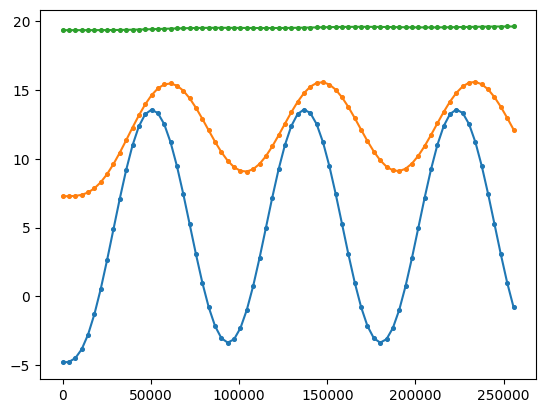

In [32]:
plot_sol(t, theta)

Plot über den Ort

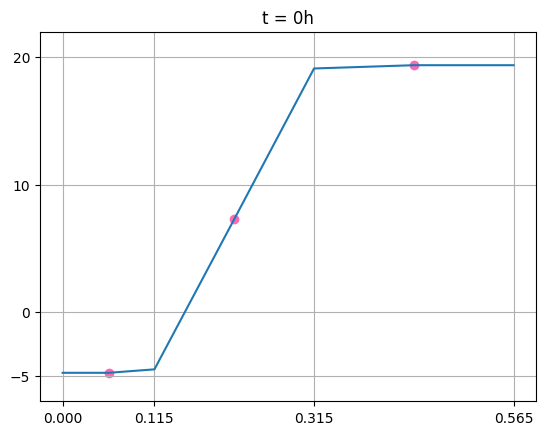

In [33]:
plot_temp(wall, theta[1, :], "t = 0h")

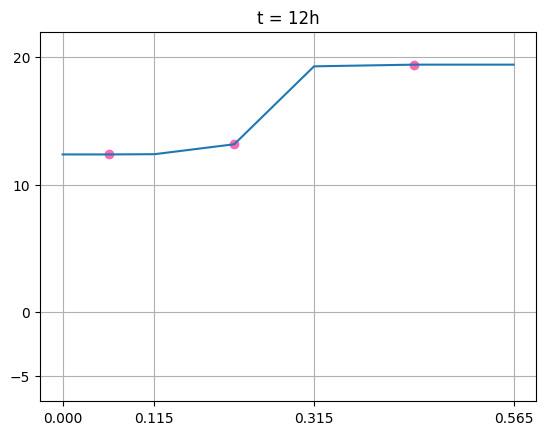

In [34]:
plot_temp(wall, theta[index(12, ht), :], "t = 12h")

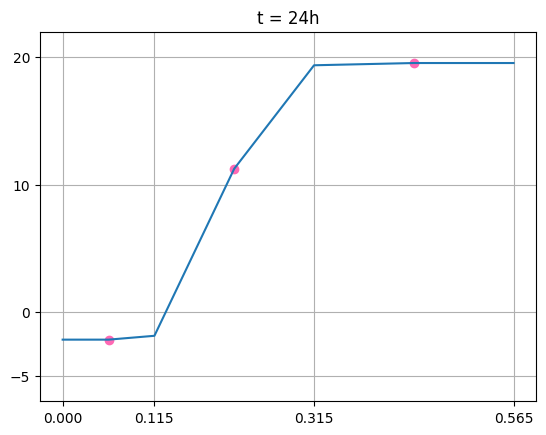

In [35]:
plot_temp(wall, theta[index(24, ht), :], "t = 24h")